<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

Excharge rates are based on the following:

- 1 euro (EUR) to dollar (USD)
- 1 pound (GPB) to dollar (USD).


<font size = "5">

Import and parse dates

In [6]:
currencies = pd.read_csv('currencies.csv')

currencies['date'] = pd.to_datetime(currencies['date_string'], format = "%A, %b %d, %Y")

<font size = "5">

Plot multiple time series


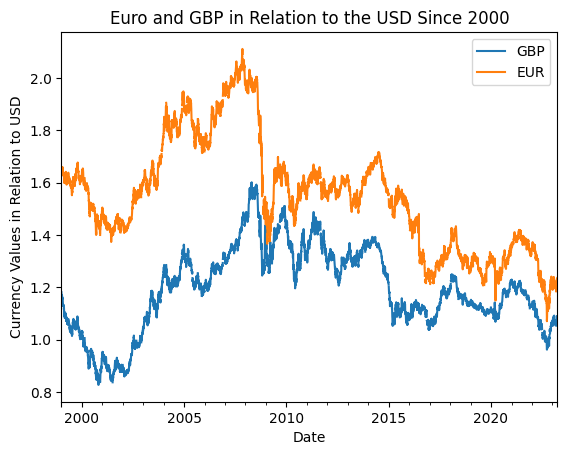

In [7]:
currencies[['date', 'gbp_to_usd', 'eur_to_usd']].set_index('date').plot()
plt.xlabel("Date")
plt.ylabel("Currency Values in Relation to USD")
plt.title("Euro and GBP in Relation to the USD Since 2000")
plt.legend(['GBP', 'EUR'])

<font size = "5">

Compute growth rates

In [8]:
currencies['diff_euro'] = currencies['eur_to_usd'].diff()
currencies['lag_euro'] = currencies['eur_to_usd'].shift(1)

currencies['growth_euro'] = currencies['diff_euro'] * 100/currencies['lag_euro']

<font size = "5">

Flag subset of data and plot


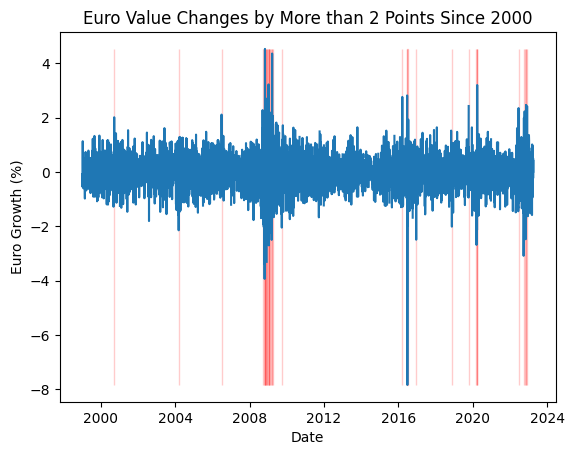

In [9]:
currencies['bool_cond'] = ((currencies['growth_euro'] > 2) ^ (currencies['growth_euro'] < -2))

plt.plot('date', 'growth_euro', data = currencies)
plt.xlabel('Date')
plt.ylabel('Euro Growth (%)')
plt.title('Euro Value Changes by More than 2 Points Since 2000')

vec_y = currencies['growth_euro']
plt.fill_between(x = currencies['date'],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = currencies['bool_cond'],
                 alpha = 0.2, color = 'red')
plt.show()

<font size = "5">

Aggregate dataset by time period



In [10]:
month_config = pd.Grouper(key = 'date', freq = 'm')

monthlydata = (currencies
               .groupby(month_config)
               .agg(eur_to_usd_std = ('eur_to_usd', 'std'))
               .reset_index())

display(monthlydata)

,date,eur_to_usd_std
0,1999-01-31,0.007345
1,1999-02-28,0.013345
2,1999-03-31,0.010475
3,1999-04-30,0.006172
4,1999-05-31,0.013046
...,...,...
286,2022-11-30,0.027308
287,2022-12-31,0.011389
288,2023-01-31,0.015046
289,2023-02-28,0.008972


<font size = "5">

Convert a dataset to long format

In [11]:
currencies_long = pd.melt(currencies,
                          var_name = 'type',
                          value_name = 'exchange_rate',
                          id_vars = 'date',
                          value_vars =['eur_to_usd', 'gbp_to_usd'])
display(currencies_long)

,date,type,exchange_rate
0,1999-01-04,eur_to_usd,1.6581
1,1999-01-05,eur_to_usd,1.6566
2,1999-01-06,eur_to_usd,1.6547
3,1999-01-07,eur_to_usd,1.6495
4,1999-01-08,eur_to_usd,1.6405
...,...,...,...
12645,2023-03-27,gbp_to_usd,1.0789
12646,2023-03-28,gbp_to_usd,1.0844
12647,2023-03-29,gbp_to_usd,1.0826
12648,2023-03-30,gbp_to_usd,1.0899
